# BLUE ORIGIN NEW SHEPARD

## Описание математической модели

### №1. Расчет максимальной скорости ракеты

In [55]:
# Модули
import math

Характеристики двигателя BE-3:

In [63]:
# Тяга (в Н)
P = 490 * 1000

# Показатель адиабаты  жидкого азота (топливо двигателя)
k = 1.410

# Давление в камере сгорания (в МПа)
p0 = 13.4 * 100000

# Диаметр критического сечения сопла (в метрах)
sec_d = 0.379

# Площадь критического сечения сопла (в метр^2)
F_kr = math.pi * (sec_d / 2) ** 2

# Температура продуктов сгорания (в Кельвинах)
T0 = 3588

# Начальная масса летательного аппарата (полезная нагрузка + конструкция аппарата + топливо) в кг
M1 = 75000

# Конечная масса летательного аппарата (полезная нагрузка + конструкция аппарата) в кг
M2 = 20569


Дополнительные константы:

In [64]:
# Ускорение свободного падения
g = 9.8

# Газовая постоянная
R = 8.31

Расчет секундного расхода массы топлива:

In [65]:
# Коэффициент в выражении для расхода
a_k = math.sqrt(k) * (2 / (k + 1)) ** ((k + 1)/(2 * (k - 1)))
print(a_k)

# секундный расход массы топлива
m = (a_k * p0 * F_kr) / math.sqrt(R * T0)
print(m)

0.6864148178041152
600.9426402728706


Расчет удельного импульса тяги:

In [66]:
# Удельный ипмульс ракетного двигателя
I = P / m
print(I)

815.3856410946397


Расчет скорости ракеты под действием тяги ракетного двигателя:

In [67]:
# Скорость
V = I * math.log(M1/M2) * 3600 / 1000
print(f"Итоговая максимальная скорость = {V} км/ч")

Итоговая максимальная скорость = 3797.5207351184636 км/ч


Расчет абсолютной погрешности:

In [68]:
# Максимальная скорость Blue Origin New Shepard (в км/x)
V_mid = 3568

# Максимальная скорость Blue Origin New Shepard в результате подсчета (в км/ч)
V_theor = V

abs_error = V_theor - V_mid
print(f"Абсолютная погрешность расчетов = {abs_error}")

Абсолютная погрешность расчетов = 229.52073511846356


Расчет относительной погрешности:

In [69]:
# Максимальная скорость Blue Origin New Shepard (в км/x)
V_mid = 3568

# Максимальная скорость Blue Origin New Shepard в результате подсчета (в км/ч)
V_theor = V

rel_error = round(abs_error / V_mid * 100, 2)
print(f"Относительная погрешность расчетов = {rel_error}%")

Относительная погрешность расчетов = 6.43%


### №2. Расчет траектории полета ракеты

In [130]:
# Модули
%pip install matplotlib

import math
import numpy as np
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\newmersedez\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Характеристики двигателя BE-3:

In [131]:
# Диаметр ракеты (в метрах)
d = 3.7

# Тяга (в Н)
P = 490 * 101.97

# Начальная масса летательного аппарата (полезная нагрузка + конструкция аппарата + топливо) в кг
m0 = 75000

# Максимальная скорость полета ракеты
v = 3568

# Время полета первой ступени
t_range = range(100)

# Угол касательной к траектории с осью X
angle = 90

Дополнительные константы:

In [132]:
# Ускорение свободного падения
g = 9.8

Расчет секундного расхода массы топлива:

In [133]:
# Коэффициент в выражении для расхода
a_k = math.sqrt(k) * (2 / (k + 1)) ** ((k + 1)/(2 * (k - 1)))
print(a_k)

# секундный расход массы топлива
m = (a_k * p0 * F_kr) / math.sqrt(R * T0)
print(m)

0.6864148178041152
600.9426402728706


Расчет изменения массы ракеты относительно времени и секундного расхода топлива:

In [134]:
# Изменение массы ракеты
m_change = [m0 - m * t_i for t_i in t_range]
print(m_change)

[75000.0, 74399.05735972713, 73798.11471945426, 73197.17207918139, 72596.22943890851, 71995.28679863564, 71394.34415836277, 70793.4015180899, 70192.45887781703, 69591.51623754416, 68990.5735972713, 68389.63095699843, 67788.68831672556, 67187.74567645269, 66586.80303617982, 65985.86039590694, 65384.91775563407, 64783.9751153612, 64183.03247508833, 63582.08983481546, 62981.14719454259, 62380.204554269716, 61779.261913996845, 61178.31927372397, 60577.3766334511, 59976.43399317824, 59375.49135290537, 58774.548712632495, 58173.606072359624, 57572.66343208675, 56971.72079181389, 56370.77815154102, 55769.835511268146, 55168.892870995274, 54567.9502307224, 53967.00759044953, 53366.06495017666, 52765.12230990379, 52164.17966963092, 51563.237029358046, 50962.294389085175, 50361.3517488123, 49760.40910853943, 49159.46646826656, 48558.5238279937, 47957.581187720825, 47356.638547447954, 46755.69590717508, 46154.75326690221, 45553.81062662935, 44952.867986356476, 44351.925346083604, 43750.9827058107

Расчет силы лобового сопротивления ракеты:

In [139]:
# Коэффициент силы лобового сопротивления
Cx = 0.4

# Плотность воздуха на высоте (каждые 1000 метров)
p_0 = 1.29
p_range = []
z = 1.25e-4
for h in range(0, 100000, 1000):
    p_range.append(p_0 * math.exp(-h * z))
print(p_range[99])

# Площадь миделя ракеты:
S = math.pi * (d / 2) ** 2
print(S)

# Сила лобового сопротивления ракеты
X_range = [Cx * (p_i * v ** 2 / 2) * S for p_i in p_range]


5.4474781474042104e-06
10.752100856911069


Расчет траектории движения:

In [138]:
points = []
for i in range(100):
    point = (P - X_range[i]) / 2 - g * math.sin(angle)
    points.append(point)


График траектории полета от времени:

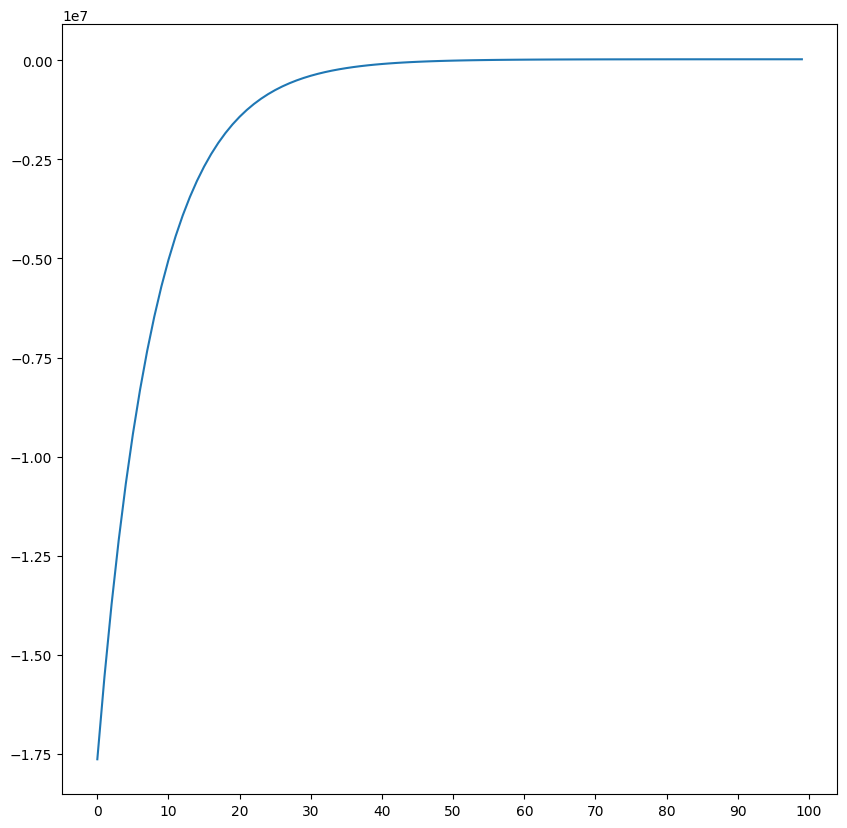

In [137]:
plt.figure(figsize=(10, 10))
plt.plot(t_range, points)
plt.xticks(np.arange(0, 110, 10))
plt.show()